In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('Data/resale_transactions_cleaned.csv')
df_hdb = pd.read_csv('Data/hdb_coords_merged.csv')

/home/roy/noisy-expressways/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Generate bins for shortest distances to expressway in the hdb coords dataset
# Dummy variables where 1 if HDB transacted unit is within x meters from expressway
# Values considered are within 50m, 100m, 150m, 200m, 250m, 500m

df_hdb['min_dist_50m'] = df_hdb['min_dist'].apply(lambda x: 1 if x <= 50 else 0) 
df_hdb['min_dist_100m'] = df_hdb['min_dist'].apply(lambda x: 1 if x <= 100 else 0)
df_hdb['min_dist_150m'] = df_hdb['min_dist'].apply(lambda x: 1 if x <= 150 else 0)
df_hdb['min_dist_200m'] = df_hdb['min_dist'].apply(lambda x: 1 if x <= 200 else 0)
df_hdb['min_dist_250m'] = df_hdb['min_dist'].apply(lambda x: 1 if x <= 250 else 0)
df_hdb['min_dist_500m'] = df_hdb['min_dist'].apply(lambda x: 1 if x <= 500 else 0)

In [75]:
# Generate bins for shortest distances to nearest MRT
# Dummy variables where 1 if HDB transacted unit is within x meters from MRT
# Values considered are within 50m, 100m, 150m, 200m, 250m, 500m

df['dist_station_50m'] = df['dist_station'].apply(lambda x: 1 if x <= 50 else 0) 
df['dist_station_100m'] = df['dist_station'].apply(lambda x: 1 if x <= 100 else 0)
df['dist_station_150m'] = df['dist_station'].apply(lambda x: 1 if x <= 150 else 0)
df['dist_station_200m'] = df['dist_station'].apply(lambda x: 1 if x <= 200 else 0)
df['dist_station_250m'] = df['dist_station'].apply(lambda x: 1 if x <= 250 else 0)
df['dist_station_500m'] = df['dist_station'].apply(lambda x: 1 if x <= 500 else 0)

In [37]:
# Number of blocks within expressway distance range bins

dist_bins = ['min_dist_50m','min_dist_100m','min_dist_150m','min_dist_200m','min_dist_250m','min_dist_500m']
df_hdb[dist_bins].sum()

min_dist_50m       15
min_dist_100m     214
min_dist_150m     463
min_dist_200m     728
min_dist_250m    1000
min_dist_500m    2438
dtype: int64

In [77]:
# Number of blocks within MRT distance bins

dist_station_bins = ['dist_station_50m','dist_station_100m','dist_station_150m','dist_station_200m','dist_station_250m','dist_station_500m']
df[dist_station_bins].sum()

dist_station_50m       303
dist_station_100m     1707
dist_station_150m     4595
dist_station_200m     9411
dist_station_250m    14581
dist_station_500m    43311
dtype: int64

In [41]:
# Average price psqm for transactions in each expressway distance bin

for b in dist_bins:
    print(b, df['resale_price_psqm'].loc[df[b] == 1].mean())
    

min_dist_50m 4123.836211962569
min_dist_100m 4415.247987918288
min_dist_150m 4371.151673827154
min_dist_200m 4442.379187321451
min_dist_250m 4457.536377934818
min_dist_500m 4537.105174760152


In [78]:
# Average price psqm for transactions in each mrt distance bin

for b in dist_station_bins:
    print(b, df['resale_price_psqm'].loc[df[b] == 1].mean())
    

dist_station_50m 4342.553240506424
dist_station_100m 4706.054568731873
dist_station_150m 4603.886115671643
dist_station_200m 4694.632549820223
dist_station_250m 4741.518058221122
dist_station_500m 4789.306813955817


In [72]:
# Average price psqm per town
df[['resale_price_psqm', 'town']] \
    .groupby('town') \
    .agg(np.mean) \
    .reset_index() \
    .sort_values('resale_price_psqm', ascending=False) \
    .to_csv('Data/aggregate_town_resale_price_psqm.csv', index=False)

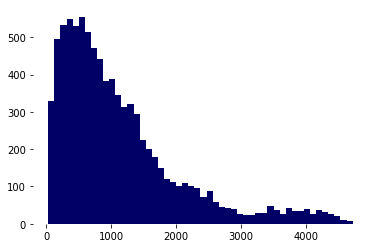

In [36]:
# Histogram of distances to expressway

plt.box(False)
counts, bins, bars = plt.hist(
    df_hdb['min_dist'], 
    bins=50, 
    color='#000066'
)
plt.savefig('static/img/min_dist_hist.png', dpi=300)

In [79]:
df_hdb['min_dist'].describe()

count    8754.000000
mean     1130.065380
std       941.045585
min        30.175394
25%       454.727524
50%       867.458563
75%      1479.205040
max      4723.723928
Name: min_dist, dtype: float64

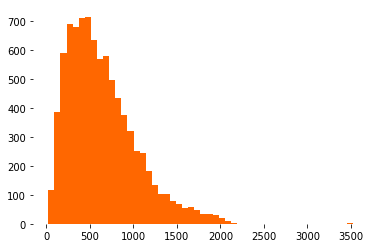

In [53]:
# Histogram of distances to MRT

plt.box(False)
counts, bins, bars = plt.hist(
    df_hdb['dist_station'], 
    bins=50, 
    color='#ff6700'
)
plt.savefig('static/img/dist_station_hist.png', dpi=300)

In [80]:
df_hdb['dist_station'].describe()

count    8754.000000
mean      643.020726
std       395.029783
min        22.755762
25%       343.751551
50%       563.839885
75%       854.590788
max      3519.942245
Name: dist_station, dtype: float64

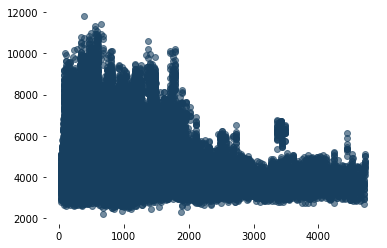

In [73]:
# Scatter of resale price against distance to expressway
plt.box(False)
plt.scatter(
    df['min_dist'],
    df['resale_price_psqm'],
    color= '#173f5f',
    alpha = 0.6
)
plt.savefig('static/img/min_dist_price_scatter.png', dpi=300)


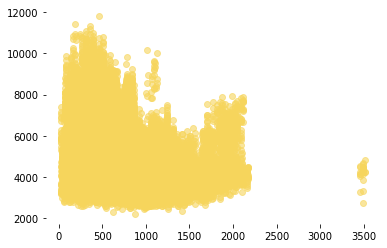

In [71]:
# Scatter of resale price against distance to nearest MRT
plt.box(False)
plt.scatter(
    df['dist_station'],
    df['resale_price_psqm'],
    color= '#f6d55c',
    alpha = 0.6
)
plt.savefig('static/img/dist_station_price_scatter.png', dpi=300)
# Outliers of distance > 3000 are Changi village road transactions